# **ANÁLISE DE REDES**
## Atividade 01 - Prática com PyVis e Streamlit
# **Autores**
### José Alex
### Fabricio Cruz

## **Instalando pyvis**

In [ ]:
!pip install pyvis

## **Importando bibliotecas e dataset**
### **Sobre o dataset:** O OpenFlights/Airline Route Mapper Route Database mapeou 59.036 rotas entre 3.209 aeroportos em 531 companhias aéreas em todo o mundo em janeiro de 2012. Segue aqui o link do dataset disponível no Kaggle: <https://www.kaggle.com/datasets/open-flights/flight-route-database>
### O nosso dataset não é fortemente conectado. Logo, não conseguimos encontrar valores de diâmetro e periferia. Para explorar essas funções vamos usar o dataset **NetworkOfThrones** que é um grafo não direcionado conectado.

In [83]:
from pyvis.network import Network
import networkx as nx
import pandas as pd
from IPython.core.display import display, HTML
import scipy as sp
import matplotlib.pyplot as plt
import collections

got_data = pd.read_csv("https://raw.githubusercontent.com/pupimvictor/NetworkOfThrones/master/stormofswords.csv")
routes_data = pd.read_csv("routes.csv")

G = nx.from_pandas_edgelist(got_data, source = "Source", target = "Target")
R = nx.from_pandas_edgelist(routes_data, source = "Source", target = "Target", create_using=nx.DiGraph())

## **Exibindo matriz de adjacencia**
Devido ao dataset ser muito grande a matriz fica resumida

In [ ]:
print(nx.adjacency_matrix(R).todense())

[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


## **Diametro da rede**

In [ ]:
print('diameter: ', nx.diameter(G))
print('periphery: ', nx.periphery(G))

diameter:  6
periphery:  ['Amory', 'Illyrio', 'Jojen', 'Luwin', 'Nan', 'Karl', 'Cressen', 'Salladhor', 'Bowen', 'Lancel', 'Shireen']


## **Histograma de distribuição empírica de grau**

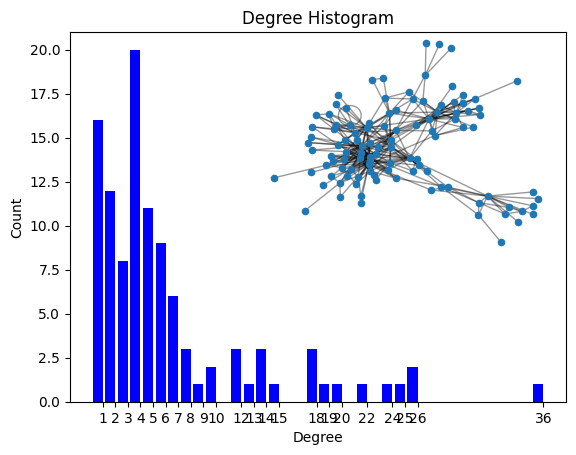

In [86]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.axes([0.4, 0.4, 0.5, 0.5])
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

## **Coeﬁciente de clustering local para nós escolhidos.**

In [ ]:
print('Clusterização')
print('Aeroporto Santos Dumont (SDU): ', nx.clustering(R, 'SDU'))
print('Aeroporto de Guarulhos (GRU): ', nx.clustering(R, 'GRU'))
print('Ambos os nós possuem valores de clusterização baixo que indica que os seus nós adjacentes não se conectam muito entre si.\n')

Clusterização
Aeroporto Santos Dumont (SDU):  0.39869281045751637
Aeroporto de Guarulhos (GRU):  0.17031927232769672
Ambos os nós possuem valores de clusterização baixo que indica que os seus nós adjacentes não se conectam muito entre si.



## **Coeﬁciente de clustering global**

In [ ]:
print('Clusterização global: ', nx.average_clustering(R))

Clusterização global:  0.4692087972063501


## **Componentes Conectados Fortemente**

In [ ]:
print('O grafo {} fortemente conectado!'.format('é' if nx.is_strongly_connected(R) else 'não é'))
print('Quantidade de nós de R: {}'.format(len(R.nodes())))
print('Quantidade de nós fortemente conectados: {}'.format(nx.number_strongly_connected_components(R)))


O grafo não é fortemente conectado!
Quantidade de nós de R: 3425
Quantidade de nós fortemente conectados: 44
Quantidade de nós de R: -0.13076253169826765


## **Componentes Conectados Fracamente.**

In [ ]:
print('O grafo {} fracamente conectado!'.format('é' if nx.is_weakly_connected(R) else 'não é'))
print('Quantidade de nós de R: {}'.format(len(R.nodes())))
print('Quantidade de nós fracamente conectados: {}'.format(nx.number_weakly_connected_components(R)))

O grafo não é fracamente conectado!
Quantidade de nós de R: 3425
Quantidade de nós fracamente conectados: 8


## **Eigenvector centrality**

In [ ]:
print('Grau de centralidade do autovetor: ', nx.eigenvector_centrality(R))

Grau de centralidade do autovetor:  {'AER': 0.00910962998496953, 'KZN': 0.008889594683449055, 'ASF': 0.004766024539464036, 'MRV': 0.009874849521192924, 'CEK': 0.006755008826793821, 'OVB': 0.02295094714619209, 'DME': 0.07664122823188792, 'NBC': 0.006385821808377644, 'TGK': 0.0011061218722922257, 'UUA': 0.002111431259414465, 'EGO': 0.0032899436236418457, 'KGD': 0.00790674926140593, 'GYD': 0.03241578077140998, 'LED': 0.06611717719265807, 'SVX': 0.02805594892507315, 'NJC': 0.0035392878697856523, 'NUX': 0.004442939002975905, 'BTK': 0.002131955650813689, 'IKT': 0.00735370865297944, 'HTA': 0.0031895766769659286, 'KCK': 0.00010613929362246447, 'ODO': 0.00010613929362246447, 'UKX': 0.00010613929362246447, 'ULK': 0.0001985338513907574, 'YKS': 0.006401519545417007, 'MJZ': 0.001819595161778424, 'AYP': 0.0003305355944406694, 'LIM': 0.02289612767079536, 'CUZ': 0.00037029224301600975, 'PEM': 0.000335881731268617, 'HUU': 0.0003305355944406694, 'IQT': 0.0007935652010205311, 'PCL': 0.0003470029697658124

## **Degree centrality**

In [ ]:
print('Grau de centralidade: ', nx.degree_centrality(R))

Grau de centralidade:  {'AER': 0.01022196261682243, 'KZN': 0.012266355140186916, 'ASF': 0.0040887850467289715, 'MRV': 0.009345794392523364, 'CEK': 0.008177570093457943, 'OVB': 0.030665887850467286, 'DME': 0.11039719626168223, 'NBC': 0.0040887850467289715, 'TGK': 0.0005841121495327102, 'UUA': 0.0017523364485981306, 'EGO': 0.005257009345794392, 'KGD': 0.005841121495327103, 'GYD': 0.0227803738317757, 'LED': 0.06483644859813084, 'SVX': 0.03825934579439252, 'NJC': 0.005257009345794392, 'NUX': 0.005841121495327103, 'BTK': 0.002336448598130841, 'IKT': 0.016355140186915886, 'HTA': 0.005257009345794392, 'KCK': 0.0005841121495327102, 'ODO': 0.0005841121495327102, 'UKX': 0.0005841121495327102, 'ULK': 0.0011682242990654205, 'YKS': 0.013434579439252336, 'MJZ': 0.003504672897196261, 'AYP': 0.0005841121495327102, 'LIM': 0.03329439252336448, 'CUZ': 0.0029205607476635513, 'PEM': 0.0011682242990654205, 'HUU': 0.0005841121495327102, 'IQT': 0.002336448598130841, 'PCL': 0.0017523364485981306, 'TPP': 0.0017

## **Closeness centrality**

In [ ]:
print('Grau de centralidade de proximidade: ', nx.closeness_centrality(R))

Grau de centralidade de proximidade:  {'AER': 0.27668636224180704, 'KZN': 0.2784729324634103, 'ASF': 0.2668372615207849, 'MRV': 0.28681894279030645, 'CEK': 0.2686071115122679, 'OVB': 0.3109644835308707, 'DME': 0.33499341467024796, 'NBC': 0.2754927592190284, 'TGK': 0.2499841704024517, 'UUA': 0.2547008528628753, 'EGO': 0.2552686386060549, 'KGD': 0.2683032818636316, 'GYD': 0.3119283974850806, 'LED': 0.32461287581878473, 'SVX': 0.3100643995916123, 'NJC': 0.26462584426059194, 'NUX': 0.26547203770294736, 'BTK': 0.2596598420225325, 'IKT': 0.2864972581853307, 'HTA': 0.26496367347212707, 'KCK': 0.22194825020894052, 'ODO': 0.22194825020894052, 'UKX': 0.22194825020894052, 'ULK': 0.22209669071871108, 'YKS': 0.27973967817590495, 'MJZ': 0.25247393899689563, 'AYP': 0.24281878616745892, 'LIM': 0.3222503366934661, 'CUZ': 0.2431566024475484, 'PEM': 0.24283654256864118, 'HUU': 0.24281878616745892, 'IQT': 0.24587514583341982, 'PCL': 0.2428543015669276, 'TPP': 0.2428543015669276, 'ABJ': 0.2867941721760228,

## **Betweenness centrality**

In [ ]:
print('Grau de centralidade de intermediação do caminho mais curto: ', nx.betweenness_centrality(R))

Grau de centralidade de intermediação do caminho mais curto:  {'AER': 2.4374519920894512e-05, 'KZN': 4.9112563120171404e-05, 'ASF': 7.817093631933586e-07, 'MRV': 2.958986292568191e-05, 'CEK': 4.369092804602329e-06, 'OVB': 0.001764870059135899, 'DME': 0.02941730185764075, 'NBC': 6.507442857981919e-07, 'TGK': 0.0, 'UUA': 7.394544691718019e-08, 'EGO': 4.0790407586458046e-07, 'KGD': 5.457130628417465e-06, 'GYD': 0.0003334544786757751, 'LED': 0.007823559341998835, 'SVX': 0.004043839273302468, 'NJC': 5.357903597135962e-06, 'NUX': 7.979979522626592e-06, 'BTK': 2.911402692434811e-07, 'IKT': 0.0028421296718841864, 'HTA': 2.178193384868891e-05, 'KCK': 0.0, 'ODO': 0.0, 'UKX': 0.0, 'ULK': 0.0, 'YKS': 0.0032452391403172097, 'MJZ': 3.839475128392048e-07, 'AYP': 0.0, 'LIM': 0.01374815595136267, 'CUZ': 2.122478102721699e-06, 'PEM': 0.0, 'HUU': 0.0, 'IQT': 5.374851646940852e-06, 'PCL': 0.0, 'TPP': 0.0, 'ABJ': 0.00037141864274777594, 'BOY': 0.0, 'OUA': 0.0002912792514027529, 'ACC': 0.002994101747201776,

## **Assortatividade geral da rede**

In [ ]:
print('Grau de centralidade de intermediação do caminho mais curto: ', nx.degree_assortativity_coefficient(R))

Grau de centralidade de intermediação do caminho mais curto:  -0.010443191050714293
